In [19]:
import requests as r
from dotenv import load_dotenv
load_dotenv()
import os
key = os.getenv("RIOTKEY")
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from time import sleep

In [5]:
username = "idashhe"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36",
    "Accept-Language": "en-GB,en-US;q=0.9,en;q=0.8",
    "Accept-Charset": "application/x-www-form-urlencoded; charset=UTF-8",
    "Origin": "https://developer.riotgames.com",
    "X-Riot-Token": key
}

In [6]:
response = r.get(f"https://na1.api.riotgames.com/lol/summoner/v4/summoners/by-name/{username}",headers=headers)
body = response.json()
puuid = body["puuid"]
print(puuid)

OAZVEmbLTrBSLLkjJes4AbQXlua8fT89_gCkNZiRzDDKWj_7IHew4gxMen7gILrQJgFebehnKcU2yA


In [14]:
matches = []
for i in range(0,5):
    start = i * 100
    response = r.get(f"https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids?start={start}&count=100&type=ranked",headers=headers)
    matches.extend(response.json())

In [15]:
len(matches)

398

In [20]:
all_participant_data = []
all_timelines = []
for match in tqdm(matches):
    try:
        response = r.get(f"https://americas.api.riotgames.com/lol/match/v5/matches/{match}",headers=headers)
        match_data = response.json()
        participants = pd.DataFrame(match_data["info"]["participants"])[["participantId","summonerName","individualPosition","teamId","championName"]]
        participants["match"] = match
        all_participant_data.append(participants)
        response = r.get(f"https://americas.api.riotgames.com/lol/match/v5/matches/{match}/timeline",headers=headers)
        timeline = response.json()
        actions = []
        for frame in timeline["info"]["frames"]:
            actions.extend(frame["events"])
        example_timeline = pd.DataFrame(actions)
        example_timeline["match"] = match
        all_timelines.append(example_timeline)
        sleep(2)
    except Exception as e:
        print(match,str(e))

 59%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                      | 234/398 [13:50<07:51,  2.88s/it]

NA1_4221289258 ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 398/398 [23:30<00:00,  3.54s/it]


In [21]:
match_parts = pd.concat(all_participant_data)
match_time = pd.concat(all_timelines)

In [22]:
match_parts.to_csv("match_participants.csv")
match_time.to_csv("match_time.csv")

In [23]:
kills = match_time[match_time["type"]=="CHAMPION_KILL"]

In [24]:
kills

,realTimestamp,timestamp,type,itemId,participantId,levelUpType,skillSlot,creatorId,wardType,level,...,monsterType,multiKillLength,buildingType,towerType,name,gameId,winningTeam,match,actualStartTime,transformType
99,NaN,196085,CHAMPION_KILL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA1_4247742394,NaN,NaN
103,NaN,199487,CHAMPION_KILL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA1_4247742394,NaN,NaN
116,NaN,223830,CHAMPION_KILL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA1_4247742394,NaN,NaN
140,NaN,253848,CHAMPION_KILL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA1_4247742394,NaN,NaN
143,NaN,261543,CHAMPION_KILL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA1_4247742394,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,NaN,1359978,CHAMPION_KILL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA1_4207291803,NaN,NaN
803,NaN,1403266,CHAMPION_KILL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA1_4207291803,NaN,NaN
834,NaN,1471418,CHAMPION_KILL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA1_4207291803,NaN,NaN
835,NaN,1473036,CHAMPION_KILL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA1_4207291803,NaN,NaN


In [25]:
relevant = []
for col in kills.columns:
    if len([x for x in kills[col].isna() if x]) < 1:
        relevant.append(col)
cleaned = kills[relevant]

In [26]:
cleaned["x"] = [x["x"] for x in cleaned["position"]]
cleaned["y"] = [x["y"] for x in cleaned["position"]]

C:\Users\eric\AppData\Local\Temp/ipykernel_2680/2112546686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["x"] = [x["x"] for x in cleaned["position"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_2680/2112546686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["y"] = [x["y"] for x in cleaned["position"]]


In [27]:
roles = []
teams = []
champs = []
ismyteams = []
summonernames = []
for row in cleaned.iterrows():
    try:
        killerId = int(row[1]["killerId"])
        match = row[1]["match"]
        da_match = match_parts[(match_parts["match"]==match) & (match_parts["participantId"]==killerId)].iloc[0]
        role = da_match["individualPosition"]
        team = da_match["teamId"]
        champ = da_match["championName"]
        summonerName = da_match["summonerName"]
        my_team = match_parts[(match_parts["match"]==match) & (match_parts["summonerName"]=="idashhe")].iloc[0]["teamId"]
        ismyteam = team == my_team
        roles.append(role)
        teams.append(team)
        ismyteams.append(ismyteam)
        champs.append(champ)
        summonernames.append(summonerName)
    except:
        roles.append("idk")
        summonernames.append("idk")
        teams.append("idk")
        ismyteams.append("idk")
        champs.append("idk")
cleaned["killerRole"] = roles
cleaned["killerTeam"] = teams
cleaned["killerChamp"] = champs
cleaned["killerismyteam"] = ismyteams
cleaned["killerSummonerName"] = summonernames
roles = []
teams = []
champs = []
for row in cleaned.iterrows():
    try:
        killerId = int(row[1]["victimId"])
        match = row[1]["match"]
        da_match = match_parts[(match_parts["match"]==match) & (match_parts["participantId"]==killerId)].iloc[0]
        role = da_match["individualPosition"]
        team = da_match["teamId"]
        champ = da_match["champName"]
        roles.append(role)
        teams.append(team)
        champs.append(champ)
    except:
        roles.append("idk")
        teams.append("idk")
        champs.append("idk")
cleaned["victimRole"] = roles
cleaned["victimTeam"] = teams
cleaned["victimChamp"] = champs

C:\Users\eric\AppData\Local\Temp/ipykernel_2680/2154893020.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["killerRole"] = roles
C:\Users\eric\AppData\Local\Temp/ipykernel_2680/2154893020.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["killerTeam"] = teams
C:\Users\eric\AppData\Local\Temp/ipykernel_2680/2154893020.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [28]:
cleaned.to_csv("kills")

In [29]:
cleaned["count"] = 1

C:\Users\eric\AppData\Local\Temp/ipykernel_2680/826903056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["count"] = 1


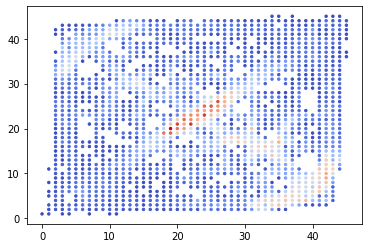

In [142]:
rounding_value = 2.5
viz = cleaned.copy()
viz["x_rounded"] = [int(x / (10 ** rounding_value)) for x in viz["x"]]
viz["y_rounded"] = [int(x / (10 ** rounding_value)) for x in viz["y"]]
summarized = viz.groupby(["x_rounded","y_rounded"]).sum().reset_index()
plt.scatter(summarized["x_rounded"],summarized["y_rounded"],c=summarized["count"],cmap="coolwarm",s=6)

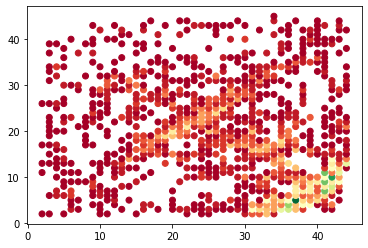

In [144]:
rounding_value = 2.5
viz = cleaned[cleaned["killerSummonerName"]==username].copy()
viz["x_rounded"] = [int(x / (10 ** rounding_value)) for x in viz["x"]]
viz["y_rounded"] = [int(x / (10 ** rounding_value)) for x in viz["y"]]
summarized = viz.groupby(["x_rounded","y_rounded"]).sum().reset_index()
plt.scatter(summarized["x_rounded"],summarized["y_rounded"],c=summarized["count"],cmap="RdYlGn")

In [145]:
summarized.sort_values("count",ascending=False).head(10)

,x_rounded,y_rounded,timestamp,bounty,killStreakLength,killerId,shutdownBounty,victimId,x,y,count
678,37,5,10741529,5796.0,19.0,122.0,650.0,127.0,225032,31996,19
794,42,10,10247601,5174.0,12.0,97.0,550.0,131.0,227834,56539,17
764,41,7,10841781,4345.0,12.0,88.0,400.0,106.0,197039,36191,15
766,41,9,7314746,4522.0,4.0,100.0,50.0,94.0,197354,45209,15
768,41,11,8384549,4397.0,17.0,91.0,200.0,108.0,197132,54319,15
650,36,4,6676841,4297.0,10.0,102.0,500.0,87.0,161824,20380,14
649,36,3,7364927,3622.0,6.0,98.0,400.0,63.0,138327,13606,12
792,42,8,6184281,3388.0,2.0,72.0,450.0,82.0,161484,32222,12
837,44,13,6090750,3097.0,10.0,45.0,0.0,101.0,154148,47353,11
818,43,11,5015376,3374.0,12.0,54.0,0.0,94.0,150796,40025,11


In [286]:
match_parts

,participantId,summonerName,individualPosition,teamId,championName,match
0,1,lllIIIIllllllIII,TOP,100,MissFortune,NA1_4247742394
1,2,Schlafbear,JUNGLE,100,Hecarim,NA1_4247742394
2,3,PPSmacks,MIDDLE,100,Yasuo,NA1_4247742394
3,4,apheliowos,BOTTOM,100,Caitlyn,NA1_4247742394
4,5,zvijer84,UTILITY,100,Lux,NA1_4247742394
...,...,...,...,...,...,...
5,6,Maxwilllum,TOP,200,Zeri,NA1_4207291803
6,7,Paktwine,JUNGLE,200,FiddleSticks,NA1_4207291803
7,8,Llineyma,MIDDLE,200,Zed,NA1_4207291803
8,9,SlugBug12,BOTTOM,200,Kaisa,NA1_4207291803


In [287]:
time_analysis = []
role = "BOTTOM"
for champ in ["Caitlyn","Jinx","Kaisa","Lucian","Ashe"]:
    for i in range(1,9):
        time_limit = i * 300000
        time_start = (i - 1) * 300000
        early_game = cleaned[(cleaned["timestamp"] < time_limit) & (cleaned["timestamp"] > time_start)]
#         rounding_value = 2
#         jungle_path = early_game[(early_game["killerRole"]==role) 
#                                  & (early_game["killerismyteam"]==True) 
#                                  & (early_game["killerChamp"]==champ) 
#                                 & (early_game["killerSummonerName"] == username)].copy()
#         jungle_path["x_rounded"] = [int(x / (10 ** rounding_value)) for x in jungle_path["x"]]
#         jungle_path["y_rounded"] = [int(x / (10 ** rounding_value)) for x in jungle_path["y"]]
#         summarized = jungle_path.groupby(["x_rounded","y_rounded"]).sum().reset_index()
#         plt.scatter(summarized["x_rounded"],summarized["y_rounded"],c=summarized["count"],cmap="RdYlGn")
#         plt.show()
        match_analysises = []
        matches = match_parts[(match_parts["summonerName"]==username) 
                              & (match_parts["individualPosition"]==role)
                             & (match_parts["championName"]==champ)]["match"].unique()
        for match in matches:
            try:
                match_data = early_game[early_game["match"]==match]
                match_analysis = {}
                my_team_role_kill_count = match_data[(match_data["killerismyteam"]==True) & \
                                                     (match_data["killerRole"]==role) & \
                                                     (match_data["killerChamp"]==champ) & \
                                                     (match_data["killerSummonerName"]==username)].index.size
                enemy_team_role_kill_count = match_data[(match_data["killerismyteam"]==False) & \
                                                     (match_data["killerRole"]==role)].index.size
                match_analysis[f"my_team_kc"] = my_team_role_kill_count
                match_analysis[f"enemy_team_kc"] = enemy_team_role_kill_count
                match_analysis["role"] = role
                match_analysis["match"] = match
                match_analysises.append(match_analysis)
            except:
                continue
        manalysis = pd.DataFrame(match_analysises)
        manalysis["advantage"] = manalysis["my_team_kc"] >= manalysis["enemy_team_kc"]
        manalysis["quant_advantage"] = manalysis["my_team_kc"] - manalysis["enemy_team_kc"]
        role_manalysis = manalysis[(manalysis["role"]==role)]
        adcount = role_manalysis[role_manalysis["advantage"]==True].index.size
        disadcount = role_manalysis[role_manalysis["advantage"]==False].index.size
        quantad = role_manalysis[role_manalysis["advantage"]==True]["quant_advantage"].mean()
        quantdisad = role_manalysis[role_manalysis["advantage"]==False]["quant_advantage"].mean() * -1
        highlevel = manalysis.groupby("match").sum().reset_index()
        my_kills = early_game[(early_game["killerismyteam"]==True)  
                                & (early_game["killerChamp"]==champ) 
                                & (early_game["killerSummonerName"] == username)
                             & (early_game["match"].isin(matches))].index.size
        enemy_kills = early_game[(early_game["killerismyteam"]==False) & (early_game["killerRole"]==role)
                                & (early_game["match"].isin(matches))].index.size
        report = {
            "time_start":time_start,
            "time_limit":time_limit,
            "role":role,
            "adcount":adcount,
            "disadcount":disadcount,
            "quantad":quantad,
            "quantdisad":quantdisad,
            "my_kills":my_kills,
            "enemy_kills":enemy_kills,
            "champ":champ
        }
        time_analysis.append(report)

In [288]:
a = pd.DataFrame(time_analysis)

In [289]:
a["time_start"] = [x/60000 for x in a["time_start"]]
a["time_limit"] = [x/60000 for x in a["time_start"]]

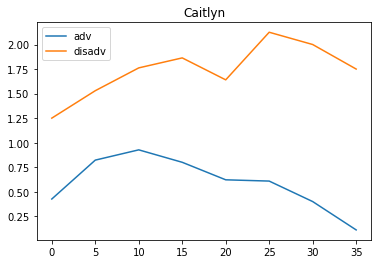

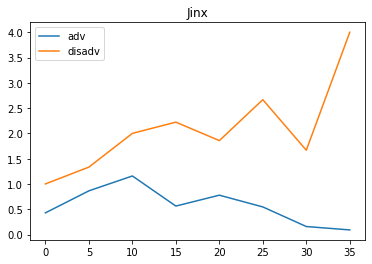

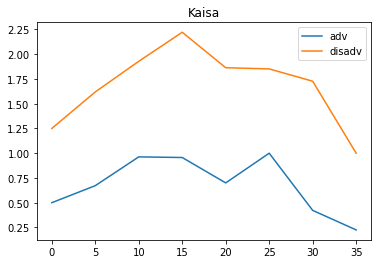

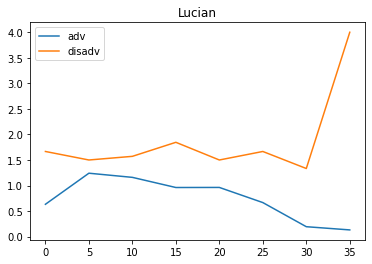

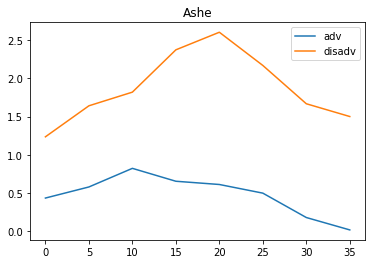

In [292]:

for champ in ["Caitlyn","Jinx","Kaisa","Lucian","Ashe"]:
    champ_timeline = a[a["champ"]==champ]
    plt.plot(champ_timeline["time_start"],champ_timeline["quantad"])
    plt.plot(champ_timeline["time_start"],champ_timeline["quantdisad"])
    plt.legend(["adv","disadv"])
    plt.title(champ)
    plt.show()

In [293]:
a

,time_start,time_limit,role,adcount,disadcount,quantad,quantdisad,my_kills,enemy_kills,champ
0,0.0,0.000000,BOTTOM,54,8,0.425926,1.250000,31,18,Caitlyn
1,5.0,0.000083,BOTTOM,45,17,0.822222,1.529412,47,36,Caitlyn
2,10.0,0.000167,BOTTOM,41,21,0.926829,1.761905,58,57,Caitlyn
3,15.0,0.000250,BOTTOM,40,22,0.800000,1.863636,63,72,Caitlyn
4,20.0,0.000333,BOTTOM,37,25,0.621622,1.640000,50,68,Caitlyn
5,25.0,0.000417,BOTTOM,46,16,0.608696,2.125000,48,54,Caitlyn
6,30.0,0.000500,BOTTOM,50,12,0.400000,2.000000,31,35,Caitlyn
7,35.0,0.000583,BOTTOM,54,8,0.111111,1.750000,15,23,Caitlyn
8,0.0,0.000000,BOTTOM,21,4,0.428571,1.000000,14,9,Jinx
9,5.0,0.000083,BOTTOM,22,3,0.863636,1.333333,31,16,Jinx
